In [3]:
import pandas as pd
df = pd.read_fwf('Patients.txt', colspecs='infer', header=None)

In [4]:
print(df)

                          0   1
0   001M11/11/1998 88140 80  10
1   016F11/13/1998 84120 78  X0
2   033X10/21/1998 68190100  31
3   004F01/01/1999101200120  5A
4   XX5M05/07/1998 68120 80  10
5   006 06/15/1999 72102 68  61
6   007M08/32/1998 88148102   0
7         008F08/08/1998210  70
8   009M09/25/1999 86240180  41
9      010F10/19/1999 40120  10
10  011M13/13/1998 68300 20  41
11  012M10/12/98   60122 74   0
12  013208/23/1999 74108 64   1
13  014M02/02/1999 22130 90   1
14  002f11/13/1998 84120 78  X0
15  003M11/12/1999 58112 74   0
16  015F           82148 88  31
17     017F04/05/1999208 84  20
18  019M06/07/1999 58118 70   0
19        123M15/12/1999 60  10
20  321f          900400200  51
21   020F99/99/9999 10 20 8   0
22  022M10/10/1999 48114 82  21
23  023F12/31/1998 22 34 78   0
24  024F11/09/199876 120 80  10
25  025M01/01/1999 74102 68  51
26  027FNOTAVAIL  NA 166106  70
27  028F03/28/1998 66150 90  30
28           029M05/15/1998  41
29  006F07/07/1999 82148 84  10


In [5]:
df.shape

(30, 2)

In [6]:
df = pd.read_fwf('Patients.txt', widths=[3,1,10,3,3,3,3,1],
header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7
0,001,M,11/11/1998,88.0,140.0,80.0,1,0
1,016,F,11/13/1998,84.0,120.0,78.0,X,0
2,033,X,10/21/1998,68.0,190.0,100.0,3,1
3,004,F,01/01/1999,101.0,200.0,120.0,5,A
4,XX5,M,05/07/1998,68.0,120.0,80.0,1,0


In [9]:
df.shape

(30, 8)

In [15]:
df.rename(
columns={0:"ID", 1:"Gender", 2:"Visit"
        , 3:"HR", 4:"SBP", 5:"DBP"
        , 6:"DX", 7:"AE"},
inplace = True
)

In [16]:
df.head()

,ID,Gender,Visit,HR,SBP,DBP,DX,AE
0,001,M,11/11/1998,88.0,140.0,80.0,1,0
1,016,F,11/13/1998,84.0,120.0,78.0,X,0
2,033,X,10/21/1998,68.0,190.0,100.0,3,1
3,004,F,01/01/1999,101.0,200.0,120.0,5,A
4,XX5,M,05/07/1998,68.0,120.0,80.0,1,0


In [17]:
df['SBP']

0     140.0
1     120.0
2     190.0
3     200.0
4     120.0
5     102.0
6     148.0
7       NaN
8     240.0
9     120.0
10    300.0
11    122.0
12    108.0
13    130.0
14    120.0
15    112.0
16    148.0
17     84.0
18    118.0
19      NaN
20    400.0
21     20.0
22    114.0
23     34.0
24    120.0
25    102.0
26    166.0
27    150.0
28      NaN
29    148.0
Name: SBP, dtype: float64

In [19]:
"""Practise 3: Plot a scatter plot of Heart Rate (HR) against Systolic Blood Pressure (SBP)
using matplotlib:"""

'Practise 3: Plot a scatter plot of Heart Rate (HR) against Systolic Blood Pressure (SBP)\nusing matplotlib:'

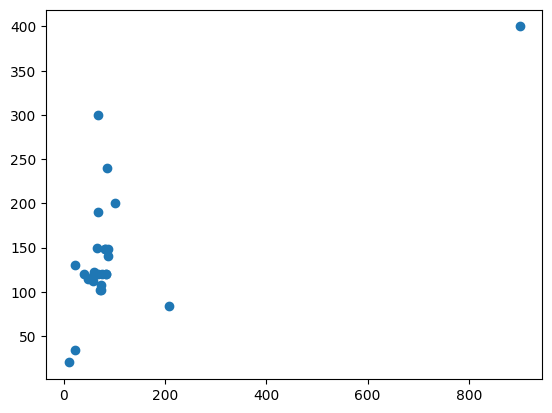

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df['HR'], df['SBP'])
plt.show()

Text(0, 0.5, 'Systolic Blood Pressure (SBP)')

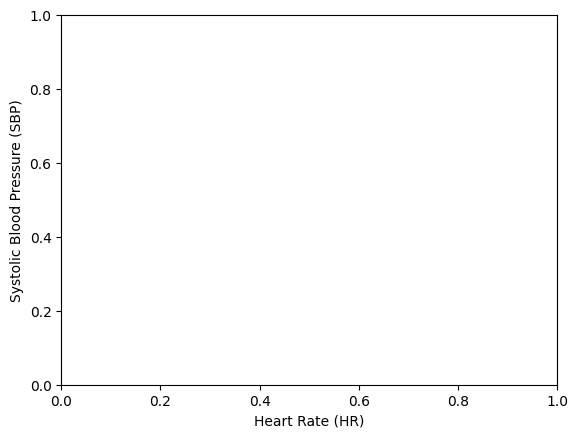

In [22]:
plt.xlabel('Heart Rate (HR)')
plt.ylabel('Systolic Blood Pressure (SBP)')

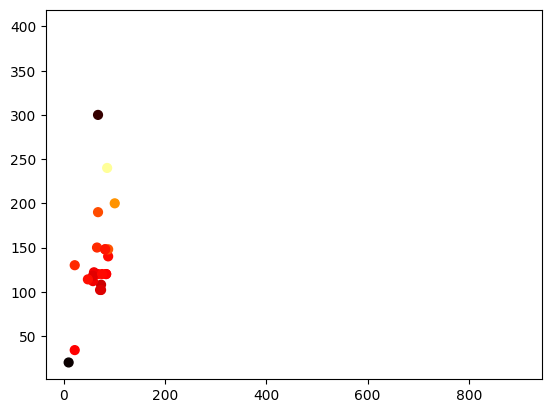

In [23]:
plt.scatter(df['HR'],df['SBP'], c=df['DBP'], s=40, cmap='hot')

# 1.2 Substituting Values

In [24]:
df['Gender']

0       M
1       F
2       X
3       F
4       M
5     NaN
6       M
7       F
8       M
9       F
10      M
11      M
12      2
13      M
14      f
15      M
16      F
17      F
18      M
19      M
20      f
21      F
22      M
23      F
24      F
25      M
26      F
27      F
28      M
29      F
Name: Gender, dtype: object

In [25]:
df.loc[df['Gender']=='f']

,ID,Gender,Visit,HR,SBP,DBP,DX,AE
14,002,f,11/13/1998,84.0,120.0,78.0,X,0
20,321,f,NaN,900.0,400.0,200.0,5,1


In [26]:
df.loc[df['Gender']=='f','Gender'] = 'F'

In [27]:
df['Gender']

0       M
1       F
2       X
3       F
4       M
5     NaN
6       M
7       F
8       M
9       F
10      M
11      M
12      2
13      M
14      F
15      M
16      F
17      F
18      M
19      M
20      F
21      F
22      M
23      F
24      F
25      M
26      F
27      F
28      M
29      F
Name: Gender, dtype: object

# 1.3 Removing Entries

In [47]:
df['SBP'].mean()

142.0909090909091

In [48]:
df.groupby('Gender')['SBP'].mean()

Gender
2    108.000000
F    134.444444
M    151.600000
X    190.000000
Name: SBP, dtype: float64

Practise 5: We might want to see average values for other variables as well, such as the
Diastolic Blood Pressure (DBP). Write a groupby() on the column “Gender” for the mean()
values of SBP and DBP. Hint: You can create a list for the SBP and DBP

In [49]:
df.groupby('Gender')['DBP'].mean()

Gender
2     64.000000
F     88.285714
M     83.000000
X    100.000000
Name: DBP, dtype: float64

In [50]:
[df.groupby('Gender')['SBP'].mean(), df.groupby('Gender')['DBP'].mean() ]

[Gender
 2    108.000000
 F    134.444444
 M    151.600000
 X    190.000000
 Name: SBP, dtype: float64,
 Gender
 2     64.000000
 F     88.285714
 M     83.000000
 X    100.000000
 Name: DBP, dtype: float64]

In [51]:
df.groupby('Gender').mean()

TypeError: Could not convert 001XX5007009011012003019022025 to numeric

In [39]:
df = df[df['SBP'] <= 350]

In [40]:
df.shape

(26, 8)

In [41]:
df

,ID,Gender,Visit,HR,SBP,DBP,DX,AE
0,001,M,11/11/1998,88.0,140.0,80.0,1,0
1,016,F,11/13/1998,84.0,120.0,78.0,X,0
2,033,X,10/21/1998,68.0,190.0,100.0,3,1
3,004,F,01/01/1999,101.0,200.0,120.0,5,A
4,XX5,M,05/07/1998,68.0,120.0,80.0,1,0
5,006,NaN,06/15/1999,72.0,102.0,68.0,6,1
6,007,M,08/32/1998,88.0,148.0,102.0,NaN,0
8,009,M,09/25/1999,86.0,240.0,180.0,4,1
9,010,F,10/19/1999,40.0,120.0,NaN,1,0
10,011,M,13/13/1998,68.0,300.0,20.0,4,1


Practise 6: Let's remove patients with a heart rate lower than 30 to be safe:

In [42]:
df = df[df['HR'] > 30]

In [43]:
df

,ID,Gender,Visit,HR,SBP,DBP,DX,AE
0,001,M,11/11/1998,88.0,140.0,80.0,1,0
1,016,F,11/13/1998,84.0,120.0,78.0,X,0
2,033,X,10/21/1998,68.0,190.0,100.0,3,1
3,004,F,01/01/1999,101.0,200.0,120.0,5,A
4,XX5,M,05/07/1998,68.0,120.0,80.0,1,0
5,006,NaN,06/15/1999,72.0,102.0,68.0,6,1
6,007,M,08/32/1998,88.0,148.0,102.0,NaN,0
8,009,M,09/25/1999,86.0,240.0,180.0,4,1
9,010,F,10/19/1999,40.0,120.0,NaN,1,0
10,011,M,13/13/1998,68.0,300.0,20.0,4,1


Practise 7: Plot out the data again to see if it's in better shape.

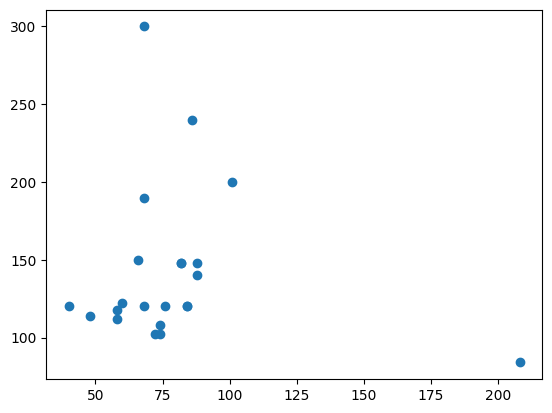

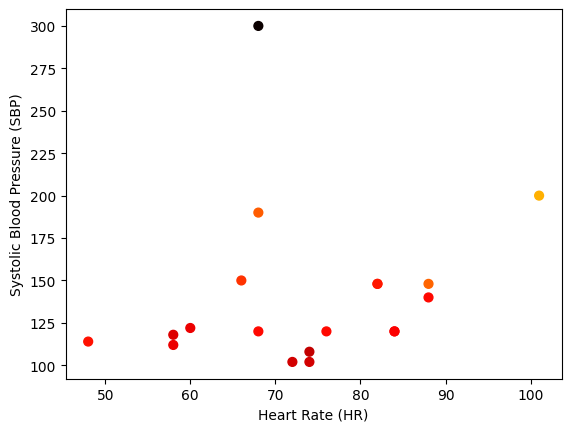

In [45]:
plt.scatter(df['HR'], df['SBP'])
plt.show()
plt.xlabel('Heart Rate (HR)')
plt.ylabel('Systolic Blood Pressure (SBP)')
plt.scatter(df['HR'],df['SBP'], c=df['DBP'], s=40, cmap='hot')